In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('/content/tweet_data.csv',usecols=range(18))

In [ ]:
df.head(3)

,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,photoUrl,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,videoUrl
0,1070867471245164544,2018-12-07 02:27:55,-1,-1,98,False,True,False,64,https://pbs.twimg.com/media/Dtx8SiIWkAImVsb.jpg,34,-1,The immediate impulse for an alliance of the E...,Business,23464532,5988062,The Economist,NaN
1,1070868017888837633,2018-12-07 02:30:05,-1,-1,13,False,True,False,10,https://pbs.twimg.com/media/Dtx8yTyW4AEciqP.jpg,3,-1,America's economy is flashing some warning sig...,Business,1732809,16184358,CNN Business,NaN
2,1070868012864028673,2018-12-07 02:30:04,-1,-1,12,False,True,False,8,NaN,4,-1,Lyft files for what is expected to be one of t...,Business,2253989,25053299,FORTUNE,NaN


In [ ]:
df.columns

Index(['tweetID', 'crDate', 'edInput', 'editor', 'engages', 'isApproved',
       'isEdNeed', 'isRT', 'likes', 'photoUrl', 'retweets', 'rtUsID', 'text',
       'topicName', 'usFlwrs', 'usID', 'usName', 'videoUrl'],
      dtype='object')

In [ ]:
df1=df[['text','topicName','edInput','crDate']]

In [ ]:
df1.head()

,text,topicName,edInput,crDate
0,The immediate impulse for an alliance of the E...,Business,-1,2018-12-07 02:27:55
1,America's economy is flashing some warning sig...,Business,-1,2018-12-07 02:30:05
2,Lyft files for what is expected to be one of t...,Business,-1,2018-12-07 02:30:04
3,"Exporters still waiting to get Rs 6,000 crore ...",Business,-1,2018-12-07 02:30:00
4,Ride-hailing firm Lyft races to leave Uber beh...,Business,-1,2018-12-07 02:30:00


In [ ]:
df1['edInput'].unique()

array([-1,  1,  2,  3,  4])

In [ ]:
df1.topicName.unique()

array(['Business', 'Animal', 'Memes', 'Nature', 'Travel', 'Interesting',
       'News', 'Fashion', 'Art', 'Personal Development', 'Motivational',
       'DIY & Craft', 'Editorial Pics', 'Funny', 'Poem', 'World Leaders',
       'Entrepreneurship', 'US News', 'Journalists', 'Flowers',
       'Cryptocurrency', 'Photography', 'Design & Architecture',
       'Fitness', 'Spirituality', 'Startup', 'Space', 'Technology',
       'Digital Media & Internet', 'Psychology', 'Science', 'Basketball',
       'Humor', 'Mindfulness', 'Medical', 'Informative', 'Love', 'Stocks',
       'Nanotech', 'Biotech', 'science', 'Random'], dtype=object)

In [ ]:
df2=df1[df1['topicName']=='Business']
df2.head()

,text,topicName,edInput,crDate
0,The immediate impulse for an alliance of the E...,Business,-1,2018-12-07 02:27:55
1,America's economy is flashing some warning sig...,Business,-1,2018-12-07 02:30:05
2,Lyft files for what is expected to be one of t...,Business,-1,2018-12-07 02:30:04
3,"Exporters still waiting to get Rs 6,000 crore ...",Business,-1,2018-12-07 02:30:00
4,Ride-hailing firm Lyft races to leave Uber beh...,Business,-1,2018-12-07 02:30:00


In [ ]:
df2=df2[(df2['edInput']== 1) | (df2['edInput']== 2)]
df2.head()

,text,topicName,edInput,crDate
12252,UK Prime Minister Theresa May will face a vote...,Business,2,2018-12-12 07:43:04
14042,UK PM Theresa May wins confidence vote with 20...,Business,2,2018-12-12 21:02:31
16954,The probe of the inaugural fund partly arises ...,Business,2,2018-12-13 21:30:32
18004,The week Brexit hit the brick wall : Commons ...,Business,1,2018-12-14 08:46:49
18396,Have watched these kinds of pictures looking f...,Business,2,2018-12-14 11:38:58


In [ ]:
df2.edInput.value_counts()

1    17836
2    12188
Name: edInput, dtype: int64

In [ ]:
17836/(12188 + 17836)

0.5940580868638422

In [ ]:
df2['text'].iloc[111]

'JUST IN: U.S. adds 312,000 jobs in December and wages top estimates https://t.co/ET36p7E93Q https://t.co/Konm3Wmmgq'

In [ ]:
#Removing urls

import re

def remove_urls(txt):
    txt = re.sub(r'https?:\/\/\S+', '', txt)
    return txt

df2['text'] = df2['text'].apply(lambda x: remove_urls(x))

In [ ]:
df2['text'].iloc[111]

'JUST IN: U.S. adds 312,000 jobs in December and wages top estimates  '

In [ ]:
#Removing Punctuation 

def remove_punctuations_numericals(txt):
    txt = re.sub(r'[^\w\s]', '', txt)
    txt = re.sub(r'\d+', '', txt)
    txt = re.sub(r'\n', '', txt)
    return txt


In [ ]:

df2['text'] = df2['text'].apply(lambda x: remove_punctuations_numericals(x))


In [ ]:
df2['text'].iloc[111]

'JUST IN US adds  jobs in December and wages top estimates  '

In [ ]:
df2['text']=df2['text'].str.lower()


In [ ]:
df2['text'].iloc[111]

'just in us adds  jobs in december and wages top estimates  '

In [ ]:
df5=df2.copy()

In [ ]:
df5['edInput'].value_counts()

1    17836
2    12188
Name: edInput, dtype: int64

In [ ]:
df6=df5[df5['edInput']==1].sample(n=12188, random_state=42)
df7=df5[df5['edInput']==2]
df8=pd.concat([df6, df7])


In [ ]:
df8['edInput'].value_counts()

1    12188
2    12188
Name: edInput, dtype: int64

In [ ]:
df8.reset_index(drop=True, inplace =True)
df8.head()

,text,topicName,edInput,crDate
0,blackrock is nearing a deal to acquire efront ...,Business,1,2019-03-22 07:56:03
1,yeti coolers have become a status symbol in am...,Business,1,2019-05-19 09:50:00
2,meet the billiondollar company jeff bezos cant...,Business,1,2019-02-25 02:49:38
3,german chancellor angela merkel is seeking to ...,Business,1,2019-06-17 19:27:53
4,investors are giving up on the developed world...,Business,1,2019-06-02 15:35:07


In [ ]:
df9=df8.drop(columns=['crDate'])
df9.head()

,text,topicName,edInput
0,blackrock is nearing a deal to acquire efront ...,Business,1
1,yeti coolers have become a status symbol in am...,Business,1
2,meet the billiondollar company jeff bezos cant...,Business,1
3,german chancellor angela merkel is seeking to ...,Business,1
4,investors are giving up on the developed world...,Business,1


In [ ]:
X=df9['text']
y=df9['edInput']

In [ ]:
from sklearn.model_selection import train_test_split

# Assume 'X' is your text data and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19500,)
(19500,)
(4876,)
(4876,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [ ]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))

Vocabulary size: 23181
Vocabulary content:
 {'obama': 14199, 'teachers': 20422, 'are': 1078, 'so': 19055, 'grossly': 8954, 'underpaid': 21646, 'in': 10161, 'this': 20742, 'country': 4659, 'that': 20618, 'those': 20759, 'san': 17893, 'francisco': 8156, 'have': 9300, 'no': 13984, 'place': 15427, 'to': 20945, 'live': 12042, 'putins': 16323, 'closest': 3850, 'ally': 631, 'fears': 7580, 'takeover': 20304, 'as': 1181, 'kremlin': 11457, 'plots': 15512, 'succession': 19930, 'joe': 11000, 'biden': 2043, 'said': 17820, 'he': 9336, 'doesnt': 6043, 'intend': 10513, 'try': 21383, 'match': 12651, 'donald': 6080, 'trump': 21353, 'the': 20624, 'nickname': 13932, 'game': 8393, 'but': 2897, 'nonetheless': 14034, 'offered': 14296, 'one': 14402, 'for': 8020, 'president': 15875, 'while': 22608, 'speaking': 19266, 'donors': 6094, 'jordan': 11058, 'peeles': 15087, 'new': 13876, 'horror': 9756, 'movie': 13497, 'usmovie': 21940, 'is': 10725, 'tracking': 21121, 'make': 12398, 'more': 13395, 'money': 13338, 'tha

In [ ]:
X_train_transformed = vect.transform(X_train)
print("bag_of_words: {}".format(repr(X_train_transformed)))

bag_of_words: <19500x23181 sparse matrix of type '<class 'numpy.int64'>'
	with 289687 stored elements in Compressed Sparse Row format>


In [ ]:
print("Dense representation of bag_of_words:\n{}".format(X_train_transformed.toarray()))

Dense representation of bag_of_words:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
X_train_transformed.shape

(19500, 23181)

In [ ]:
X_train_transformed.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0])

# #Check some of the features (words)

In [ ]:
feature_names = vect.get_feature_names_out()
print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[2010:2030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 features:
['_davidgoodman' '_solodarity' 'aabid' 'aaja' 'aap' 'aapl' 'aaron'
 'aasugar' 'ab' 'ababa' 'abandon' 'abandoned' 'abandoning' 'abandons'
 'abate' 'abbe' 'abbey' 'abbott' 'abbreviations' 'abc' 'abcpost'
 'abcsharktank' 'abdicating' 'abdication' 'abdomen' 'abducted' 'abduction'
 'abdullah' 'abdurahman' 'abe' 'abel' 'abes' 'abetting' 'abide' 'abides'
 'abigail' 'abigaildisney' 'abilities' 'ability' 'able' 'ablin' 'abloh'
 'abmarkman' 'abnormally' 'aboard' 'abolish' 'abolishing' 'abolition'
 'aborted' 'abortion']
Features 20010 to 20030:
['beverages' 'beverly' 'beware' 'bewhite' 'beyonce' 'beyonces' 'beyoncé'
 'beyoncés' 'beyond' 'beyondmeat' 'bezos' 'bezoses' 'bezoss' 'bffs'
 'bharatiya' 'bhp' 'bhum' 'bhutan' 'bi_strategy' 'biaggiluggageshop']
Every 700th feature:
['_davidgoodman' 'ambitions' 'austrias' 'binance' 'builds' 'checklist'
 'compound' 'cryptocurrency' 'detoxing' 'dubois' 'ethicon' 'figured'
 'gameofthronesfinale' 'hair' 'housejudiciary' 'intact' 'karen'
 'lif

In [ ]:
X_test_transformed = vect.transform(X_test)
X_test_transformed

<4876x23181 sparse matrix of type '<class 'numpy.int64'>'
	with 69339 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression object with default parameters(Chnaging number of iteartions to 1000)
#(Default parameters:lr.get_params())
#

lr = LogisticRegression(max_iter=1000, class_weight='balanced')    #              
# Train the model on the training data
lr.fit(X_train_transformed, y_train)

# Use the trained model to make predictions on the testing data
y_pred = lr.predict(X_test_transformed)

# Evaluate the accuracy of the model
accuracy = lr.score(X_test_transformed, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7986054142739951


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score

# Calculate the precision, recall, and accuracy, F1-score of the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1-score:", f1)

Precision: 0.8058653448988021
Recall: 0.7921234267153877
Accuracy: 0.7986054142739951
F1-score: 0.798935298935299


# GridSearchCV: param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 0.5,1,2,4,8]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train_transformed, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.80
Best parameters:  {'C': 0.5}


In [ ]:
X_test_transformed = vect.transform(X_test)
print("{:.2f}".format(grid.score(X_test_transformed, y_test)))

0.80


# Set the minimum number of documents a token needs to appear in with the min_df parameter:

In [ ]:
vect = CountVectorizer(min_df=5).fit(X_train)
X_train_transformed2 = vect.transform(X_train)
print("X_train with min_df: {}".format(repr(X_train_transformed2)))

X_train with min_df: <19500x6456 sparse matrix of type '<class 'numpy.int64'>'
	with 262029 stored elements in Compressed Sparse Row format>


In [ ]:
X_train_transformed2.shape

(19500, 6456)

In [ ]:
feature_names = vect.get_feature_names_out()
print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[2010:2030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 features:
['abandon' 'abandoned' 'abdication' 'abe' 'ability' 'able' 'aboard'
 'abortion' 'abortions' 'about' 'above' 'abraham' 'abroad' 'abrupt'
 'abruptly' 'absolute' 'absolutely' 'absorb' 'abu' 'abuse' 'academy'
 'accents' 'accept' 'acceptance' 'accepts' 'access' 'accident'
 'accomplish' 'accomplished' 'accord' 'according' 'account'
 'accountability' 'accountable' 'accounting' 'accounts' 'accurate'
 'accusations' 'accused' 'accuses' 'accusing' 'achieve' 'achieved'
 'achievers' 'achieving' 'acquire' 'acquisition' 'acre' 'across' 'act']
Features 20010 to 20030:
['explosion' 'explosions' 'explosive' 'export' 'exporter' 'exporters'
 'exports' 'exposed' 'exposes' 'exposure' 'express' 'expressed' 'extend'
 'extended' 'extending' 'extends' 'extension' 'extinction' 'extra'
 'extradition']
Every 700th feature:
['abandon' 'bpolitics' 'dads' 'favor' 'increase' 'measures' 'playing'
 'sand' 'taco' 'whose']


In [ ]:
#Check to see if 'min_df=5' plays a role in acuracy?  

In [ ]:
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train_transformed2, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.80


In [ ]:
X_test_transformed2 = vect.transform(X_test)
print("{:.2f}".format(grid.score(X_test_transformed2, y_test)))

0.79


# Remove Stopwords

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['my', 'wherever', 'system', 'being', 'further', 'could', 'been', 'some', 'those', 'after', 'afterwards', 'hers', 'at', 'thus', 'then', 'made', 'move', 'perhaps', 'with', 'how', 'whenever', 'call', 'very', 'himself', 'somewhere', 'seem', 'thru', 'is', 'few', 'namely', 'amongst', 'sometime']


In [ ]:
# Specifying stop_words="english" uses the built-in list.
# We could also augment it and pass our own.
vect = CountVectorizer(min_df=5, stop_words="english").fit(X_train)
X_train_transformed3 = vect.transform(X_train)
print("X_train with stop words:\n{}".format(repr(X_train_transformed3)))

X_train with stop words:
<19500x6205 sparse matrix of type '<class 'numpy.int64'>'
	with 150863 stored elements in Compressed Sparse Row format>


In [ ]:
#Let’s run the grid search again:

In [ ]:
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train_transformed3, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.80


In [ ]:
X_test_transformed3 = vect.transform(X_test)
print("{:.2f}".format(grid.score(X_test_transformed3, y_test)))

0.79


# Rescaling the Data with tf–idf

In [ ]:
#scikit-learn implements the tf–idf method in two classes: TfidfTransformer, which takes in the sparse matrix output produced by 
#CountVectorizer and transforms it, 
#and TfidfVectorizer, which takes in the text data and does both the bag-of-words feature extraction and the tf–idf transformation. 
#
#Because tf–idf actually makes use of the statistical properties of the training data, we will use a pipeline, as described in Chapter 6,
#to ensure the results of our grid search are valid. This leads to the following code:
#pipe = make_pipeline(TfidfVectorizer(min_df=5, .......stop_words="english".....,norm=None), LogisticRegression(max_iter=1000))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, stop_words="english",norm=None), LogisticRegression(max_iter=1000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1,0.5, 1,2,4,8,10]}
grid_tfidf = GridSearchCV(pipe, param_grid, cv=5)
grid_tfidf.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid_tfidf.best_score_))

Best cross-validation score: 0.79


# accuracy_score, precision_score, recall_score, f1_score 


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# predict the class labels of the test set
y_pred = grid_tfidf.predict(X_test)

# compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

# compute other metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))


Accuracy: 0.80
Precision: 0.82
Recall: 0.77
F1-score: 0.79


# Investigating Model Coefficients

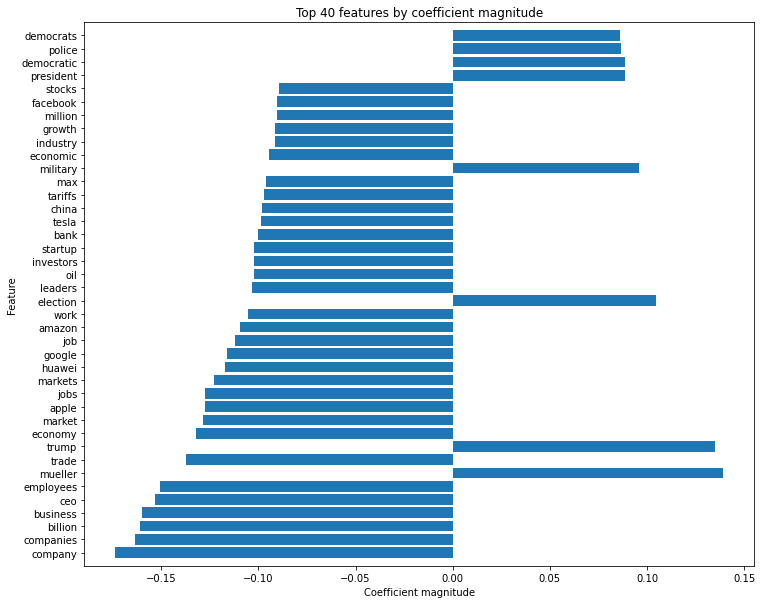

In [ ]:
import matplotlib.pyplot as plt

# get the coefficients and feature names
coef = grid_tfidf.best_estimator_.named_steps["logisticregression"].coef_[0]
feature_names = np.array(feature_names)
#sort the coefficients by absolute value and get the top 40
top_coef_idx = np.argsort(np.abs(coef))[::-1][:40]
top_coef = coef[top_coef_idx]
top_feature_names = feature_names[top_coef_idx]

# create a horizontal bar plot of the top coefficients
plt.figure(figsize=(12, 10))
plt.barh(range(len(top_coef)), top_coef, align='center')
plt.yticks(range(len(top_coef)), top_feature_names)
plt.xlabel("Coefficient magnitude")
plt.ylabel("Feature")
plt.ylim(-1, len(top_coef))
plt.title("Top 40 features by coefficient magnitude")
plt.show()

# Bag-of-Words with More Than One Word (n-Grams)
We can change the range of tokens that are considered as features by changing the ngram_range parameter of CountVectorizer or TfidfVectorizer. 
Let’s try out the TfidfVectorizer and find the best setting of n-gram range using a grid search:

In [ ]:
pipe = make_pipeline(TfidfVectorizer(min_df=5, stop_words="english"), LogisticRegression(max_iter=1000))
# running the grid search takes a long time because of the
# relatively large grid and the inclusion of trigrams
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 0.5,1,2,4,8, 10], "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}
grid_dfidf2 = GridSearchCV(pipe, param_grid, cv=5)
grid_dfidf2.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid_dfidf2.best_score_))
print("Best parameters:\n{}".format(grid_dfidf2.best_params_))

Best cross-validation score: 0.80
Best parameters:
{'logisticregression__C': 1, 'tfidfvectorizer__ngram_range': (1, 2)}


# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Define the pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, stop_words='english'), RandomForestClassifier())

# Define the parameter grid
param_grid = {"randomforestclassifier__n_estimators": [100, 200,400,600, 800, 1000], 
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

# Define the grid search object
RFgrid = GridSearchCV(pipe, param_grid, cv=5)

# Fit the grid search object to the training data
RFgrid.fit(X_train, y_train)

# Print the best cross-validation score and the best parameters
print("Best cross-validation score: {:.2f}".format(RFgrid.best_score_))
print("Best parameters:\n{}".format(RFgrid.best_params_))

# Get the accuracy on the test set
accuracy = RFgrid.score(X_test, y_test)
print("Test accuracy: {:.2f}".format(accuracy))


Best cross-validation score: 0.79
Best parameters:
{'randomforestclassifier__n_estimators': 400, 'tfidfvectorizer__ngram_range': (1, 2)}
Test accuracy: 0.79
